# In this document, we try to figure out the correlation between fed fund and bitcoin price. Many people believe fed fund is of cruicial importance for bitcoin price movement. Is that true? 

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import  mplfinance as mpf
import numpy as np

## This dataset contains 1674 months data of fed funds and is collected from https://alfred.stlouisfed.org/series/downloaddata?seid=FEDFUNDS:

In [2]:
df = pd.read_csv("C:/users/alire/Downloads/FEDFUNDS.csv")
print("This dataaset contains", df.size, "months data of fed funds.")
df.head()

This dataaset contains 1674 months data of fed funds.


,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


## Good to know that there is no null value in dataset:

In [3]:
df.isnull().sum()

DATE        0
FEDFUNDS    0
dtype: int64

## Let's take a look at description of dataset. As you see the mean of fed funds is equal to 4.6:

In [4]:
df.describe()

,FEDFUNDS
count,837.000000
mean,4.604277
std,3.586251
min,0.050000
25%,1.810000
50%,4.210000
75%,6.240000
max,19.100000


## We can see which months had the highest rate of fed funds (if you're interested then you can do your own research to see what caused this at that time) :

In [5]:
df.sort_values(by='FEDFUNDS', ascending = False).head()

,DATE,FEDFUNDS
323,1981-06-01,19.10
318,1981-01-01,19.08
324,1981-07-01,19.04
317,1980-12-01,18.90
322,1981-05-01,18.52


## And which had the lowest rate of fed funds:

In [6]:
df.sort_values(by='FEDFUNDS', ascending = True).head()

,DATE,FEDFUNDS
789,2020-04-01,0.05
790,2020-05-01,0.05
802,2021-05-01,0.06
715,2014-02-01,0.07
684,2011-07-01,0.07


## Now we take a look at bitcoin dataset, it is collected with the help of yfinance library:

In [7]:
btc_df = yf.download('BTC-USD', start='2020-01-01', end='2024-05-07')
btc_df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,59123.433594,32711813559
2024-05-03,59122.300781,63320.503906,58848.312500,62889.835938,62889.835938,33172023048
2024-05-04,62891.031250,64494.957031,62599.351562,63891.472656,63891.472656,20620477992
2024-05-05,63892.453125,64610.890625,62955.304688,64031.132812,64031.132812,18296164805
2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697


## There is no null value in dataset:

In [8]:
btc_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Let's take a look at description of dataset. The interesting thing to know is the mean of its price:

In [9]:
btc_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1.588000e+03
mean,31096.145456,31803.978025,30338.623331,31128.740766,31128.740766,3.225180e+10
std,16648.659057,17076.687087,16150.514751,16653.867400,16653.867400,1.854932e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,18368.767090,18843.020508,17893.108887,18498.454102,18498.454102,2.018018e+10
50%,28965.372070,29364.446289,28422.126953,28969.038086,28969.038086,2.920407e+10
75%,42862.927734,43719.222656,42003.992188,42862.561523,42862.561523,3.942206e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [10]:
btc_df["Close"].sort_values(ascending= False)

Date
2024-03-13    73083.500000
2024-03-11    72123.906250
2024-04-08    71631.359375
2024-03-12    71481.289062
2024-03-14    71396.593750
                  ...     
2020-03-18     5238.438477
2020-03-17     5225.629395
2020-03-14     5200.366211
2020-03-16     5014.479980
2020-03-12     4970.788086
Name: Close, Length: 1588, dtype: float64

## We will just consider the close price and ignore the shadows of candles :

In [11]:
btc_df = pd.DataFrame(btc_df["Close"])
btc_df.head()

,Close
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


## Since we have data of fed funds on first day of each month, we take the bitcoin price on first day of each month

In [12]:
btc_df = btc_df.groupby(pd.Grouper(freq='MS')).first()
btc_df.head()

,Close
Date,
2020-01-01,7200.174316
2020-02-01,9392.875000
2020-03-01,8562.454102
2020-04-01,6606.776367
2020-05-01,8864.766602


## Let's normalize the price between 0 and 1

In [13]:
min_btc_close = btc_df.min()
max_btc_close = btc_df.max()
btc_df = ((btc_df - min_btc_close) / (max_btc_close - min_btc_close)) * (1 - 0)
btc_df.head()

,Close
Date,
2020-01-01,0.009405
2020-02-01,0.044157
2020-03-01,0.030996
2020-04-01,0.000000
2020-05-01,0.035787


## Let's normalize the data between 0 and 1

In [14]:
df = df[-51:]
print("The size of dataset is :", df["FEDFUNDS"].size)
btc_df = btc_df[:-2]
print("The size of dataset is :" , btc_df["Close"].size)

The size of dataset is : 51
The size of dataset is : 51


In [15]:
df.head(3)

,DATE,FEDFUNDS
786,2020-01-01,1.55
787,2020-02-01,1.58
788,2020-03-01,0.65


In [16]:
btc_df.head(3)

,Close
Date,
2020-01-01,0.009405
2020-02-01,0.044157
2020-03-01,0.030996


In [17]:
min_fed_fund_rate = df["FEDFUNDS"].min()
max_fed_fund_rate = df["FEDFUNDS"].max()
df["FEDFUNDS"] = ((df["FEDFUNDS"]- min_fed_fund_rate ) / (max_fed_fund_rate- min_fed_fund_rate)) * (1 - 0)
df.head()

,DATE,FEDFUNDS
786,2020-01-01,0.284091
787,2020-02-01,0.289773
788,2020-03-01,0.113636
789,2020-04-01,0.000000
790,2020-05-01,0.000000


In [18]:
min_btc_close_price = btc_df["Close"].min()
max_btc_close_price = btc_df["Close"].max()
btc_df["Close"] = ((btc_df["Close"] - min_btc_close_price ) / (max_btc_close_price - min_btc_close_price)) * (1 - 0)
btc_df.head()

,Close
Date,
2020-01-01,0.010628
2020-02-01,0.049900
2020-03-01,0.035027
2020-04-01,0.000000
2020-05-01,0.040441


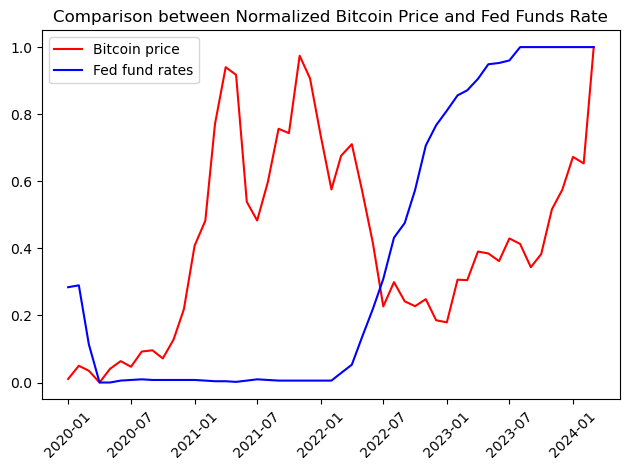

In [19]:
plt.plot(btc_df.index, btc_df, color = "red", label= "Bitcoin price")
plt.plot(btc_df.index, df["FEDFUNDS"], color = "blue", label = "Fed fund rates")
plt.title("Comparison between Normalized Bitcoin Price and Fed Funds Rate")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Let's calculate the pearson correlation which gives us a relatively good idea of how these two are related to each other:

In [20]:
from scipy.stats import pearsonr
pearsonr_result = pearsonr(df["FEDFUNDS"],btc_df["Close"])
print(pearsonr_result[0])
if abs(pearsonr_result[0]) == 1:
    print("Perfect linear relationship")
elif abs(pearsonr_result[0]) >= 0.70:
    print("Strong relation")
elif 0.3 <= abs(pearsonr_result[0]) < 0.7 :
    print("A moderate relation")
elif abs(pearsonr_result[0]) < 0.3:
    print("Weak relation")
elif pearsonr_result[0] == 0:
    print("No correlation")

-0.02071678142359367
Weak relation


## So there is not a good correlation between them.

## But what if we calculate that in shorted periods. Can they be related? 

In [21]:
i = 0
pearson_results = []
periods = []

while i <= 47:
    start_period = df.iloc[i]["DATE"]
    end_period = df.iloc[i+3]["DATE"]
    periods.append(f"Period {start_period} - {end_period}") 
    
    pearson_result = (pearsonr(df["FEDFUNDS"][i:i+4], btc_df["Close"][i:i+4]))[0]
    pearson_results.append(pearson_result)
    i += 3

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [22]:
import math
i = 0
labeled_results = {}
for p_result in pearson_results:
    if abs(p_result) == 1:
        print("Perfect linear relationship in" , periods[i])
        labeled_results[periods[i]] = "Perfect"
    elif abs(p_result) >= 0.70:
        print("Strong relation in", periods[i])
        labeled_results[periods[i]] = "Strong"
    elif 0.3 <= abs(p_result) < 0.7 :
        print("A moderate relation in", periods[i])
        labeled_results[periods[i]] = "Moderate"
    elif abs(p_result) < 0.3:
        print("Weak relation in" , periods[i])
        labeled_results[periods[i]] = "Weak"
    elif p_result == 0:
        print("No correlation in ", periods[i])
        labeled_results[periods[i]] = "NoCorrelation"
    elif math.isnan(p_result):
        print("Fed fund was constant in" , periods[i], ", the correlation coefficient is not defined.")
        labeled_results[periods[i]] = "Nan"
    i+=1

A moderate relation in Period 2020-01-01 - 2020-04-01
A moderate relation in Period 2020-04-01 - 2020-07-01
A moderate relation in Period 2020-07-01 - 2020-10-01
Fed fund was constant in Period 2020-10-01 - 2021-01-01 , the correlation coefficient is not defined.
Strong relation in Period 2021-01-01 - 2021-04-01
Strong relation in Period 2021-04-01 - 2021-07-01
Strong relation in Period 2021-07-01 - 2021-10-01
Fed fund was constant in Period 2021-10-01 - 2022-01-01 , the correlation coefficient is not defined.
A moderate relation in Period 2022-01-01 - 2022-04-01
Strong relation in Period 2022-04-01 - 2022-07-01
Weak relation in Period 2022-07-01 - 2022-10-01
A moderate relation in Period 2022-10-01 - 2023-01-01
Strong relation in Period 2023-01-01 - 2023-04-01
Weak relation in Period 2023-04-01 - 2023-07-01
A moderate relation in Period 2023-07-01 - 2023-10-01
Fed fund was constant in Period 2023-10-01 - 2024-01-01 , the correlation coefficient is not defined.


## We see improvements here. Even tough we got a weak relation before, there are some periods that shows us a strong relation. Let's visualize them to have a better understanding: 

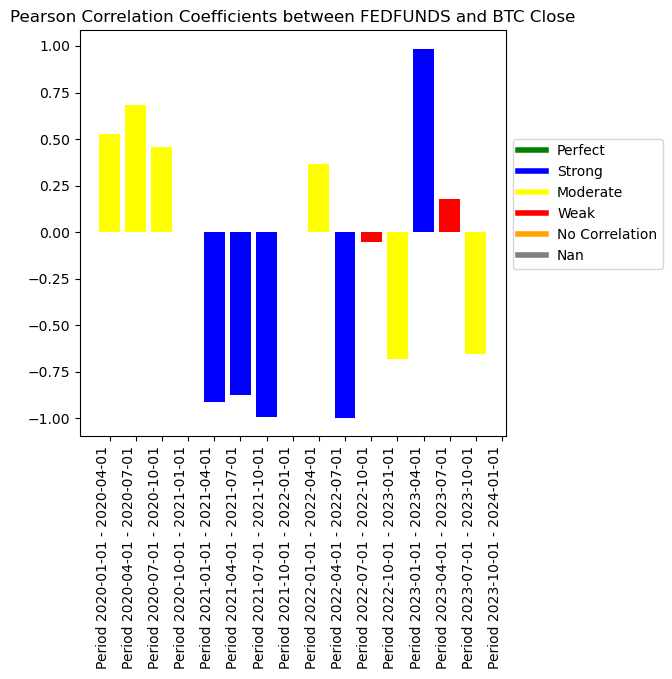

In [32]:
from matplotlib.lines import Line2D

colors = {
    "Perfect": "green",
    "Strong": "blue",
    "Moderate": "yellow",
    "Weak": "red",
    "NoCorrelation": "orange",
    "Nan": "gray"
}

bar_colors = []
for period in periods:
    if period in labeled_results:
        bar_color = colors[labeled_results.get(period)] 
        bar_colors.append(bar_color)

x_values = np.arange(len(periods))
    
fig, ax = plt.subplots()
bars = ax.bar(periods, pearson_results, color=bar_colors)
    
plt.title('Pearson Correlation Coefficients between FEDFUNDS and BTC Close')
plt.tight_layout()
plt.xticks(x_values, periods, rotation=90, ha='right')

legend_elements = [
    Line2D([0], [0], color='green', lw=4, label='Perfect'),
    Line2D([0], [0], color='blue', lw=4, label='Strong'),
    Line2D([0], [0], color='yellow', lw=4, label='Moderate'),
    Line2D([0], [0], color='red', lw=4, label='Weak'),
    Line2D([0], [0], color='orange', lw=4, label='No Correlation'),
    Line2D([0], [0], color='gray', lw=4, label='Nan')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 0.75))